### Exercise 6.18
PH 295  
Nick Ball  
**Purpose:**
Write a function that calculates the value of $\eta$ for a given temperature T and use this to graph between 300K and 10000K. Use the golden ratio to calculate the temperature of maximum efficiency.

*Efficiency $\eta$ of a lightbulb:*
$$
\eta = \frac{15}{\pi^4}\int_{hc/\lambda_{2}k_{B}T}^{hc/\lambda_{1}k_{B}T} \frac{x^3}{e^x-1}dx
$$

In [1]:
#Import Libraries
from gaussxw import gaussxwab
from numpy import exp, pi, linspace, sqrt
from matplotlib import pyplot as plt

a) Write a python function that takes a temperature T as it's argument and calculates the value of $\eta$ for that temperature for the formula above.

In [2]:
#Define functions
def integrand(x):                
    return x**3/(exp(x)-1)

def η(T):
    a = hc/λ2/kB/T
    b = hc/λ1/kB/T
    N = 100
    s = 0.0
    
    x,w = gaussxwab(N,a,b)
    for k in range(N):
        s += w[k]*integrand(x[k])
    return 15*s/pi**4

In [3]:
#Set up range of T to graph
T = linspace(300,10000,100)     #K

#Define Vars
λ1 = 390        #nm
λ2 = 750        #nm
kB = 8.617e-5   #ev/K
hc = 1240       #ev*nm
ηval = []       #empty list

#Calculate values of η for graphing list
for i in range(len(T)):
    ηval.append(η(T[i]))

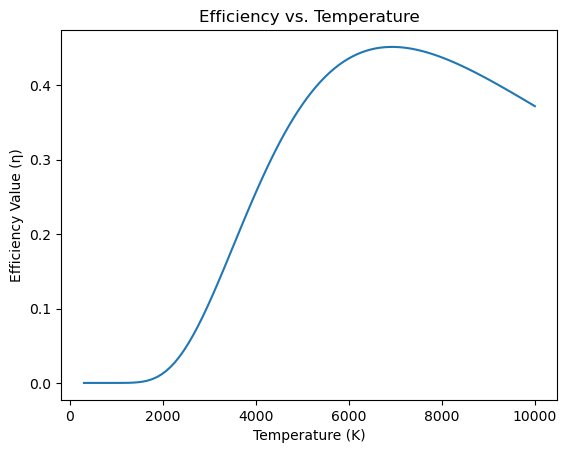

In [4]:
#Graph
plt.plot(T,ηval)
plt.xlabel(f'Temperature (K)')
plt.ylabel(f'Efficiency Value (η)')
plt.title(f'Efficiency vs. Temperature')
plt.show()

b) Calculate the maximum efficiency of the light bulb to within 1 K using the golden ratio search.

In [5]:
#Define Golden Ratio
ϕ = 0.5*(1+sqrt(5))

#Define Parameters
x1 = 300           #K
x4 = 10000         #K

#Error parameters
ϵ = 1              #K
error = x4-x1

#Find interior points
x2 = x4 - (x4-x1)/ϕ
x3 = x1 + (x4-x1)/ϕ
f2 = η(x2)
f3 = η(x3)

#Search for max value
while error > ϵ:
    if f2 < f3:      #inequality determines min or max
        x1,x2,f2,x3 = x2,x3,f3,x2+(x4-x2)/ϕ
        f3 = η(x3)
    else:
        x2,x3,x4,f3 = x3-(x3-x1)/ϕ,x2,x3,f2
        f2 = η(x2)
    error = (x4-x1)

print(f'Temperature of maximum efficiency: {int(0.5*(x3+x2))} K')

Temperature of maximum efficiency: 6929 K


c) Most likely not as the melting temperature of tungsten is $\sim 6191$ K, which is far below the most efficient temperature.

**Conslusion:**
I'm curious whether a golden ratio function exists or could be created to streamline the process. It seems like a great tool, but I'm sure there are limitations to the method, like most other things.